In [2]:
import pandas as pd
%matplotlib inline
import seaborn as sns

In [3]:
vot = pd.read_csv('data/vots.csv')
vot.head()

,language,gender,height,closure,vot,pclo,tclo,kclo,pvot,tvot,kvot
0,English,Female,162.50,0.022967,0.088828,0.022,0.0207,0.0262,0.086985,0.087877,0.091621
1,English,Male,177.00,0.050667,0.054667,0.081,0.0320,0.0390,0.072000,0.049000,0.043000
2,English,Female,170.18,0.070000,0.166667,0.070,0.0700,0.0700,0.150000,0.230000,0.120000
3,English,Male,178.00,0.039667,0.145667,0.034,0.0560,0.0290,0.170000,0.190000,0.077000
4,English,Female,177.80,0.100333,0.154000,0.144,0.0940,0.0630,0.132000,0.153000,0.177000


Types of plots:

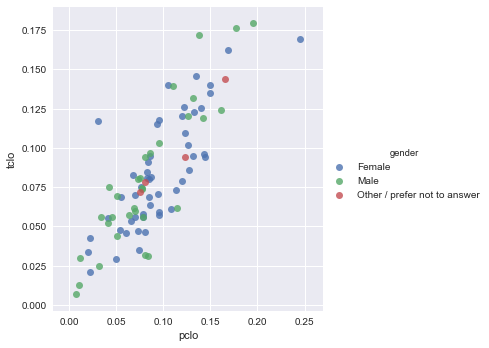

In [4]:
sns.lmplot('pclo', 'tclo', data=vot, fit_reg=False, hue="gender")

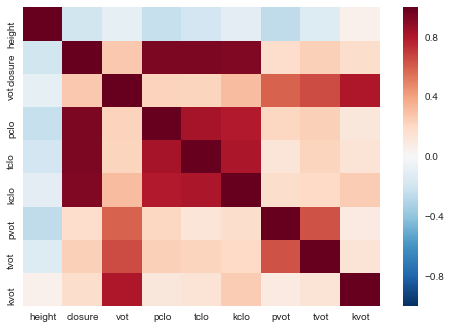

In [5]:
sns.heatmap(vot.corr())

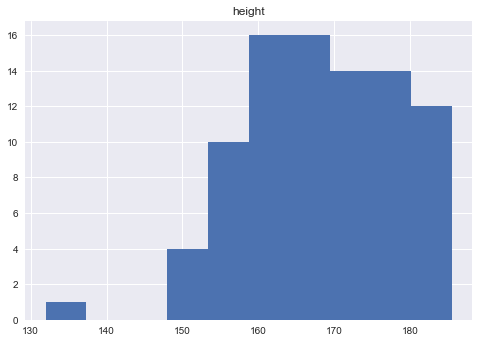

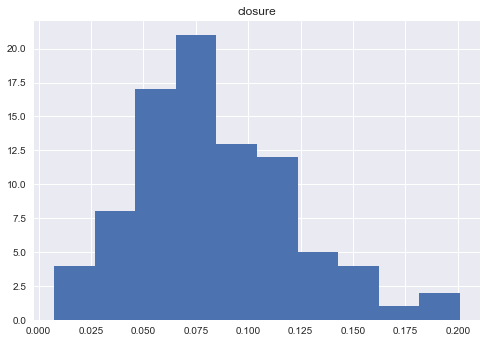

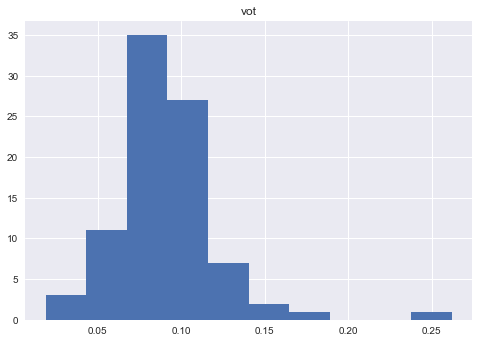

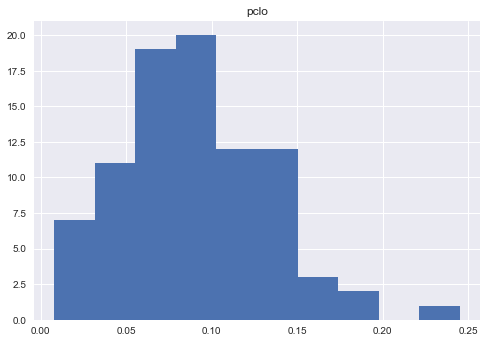

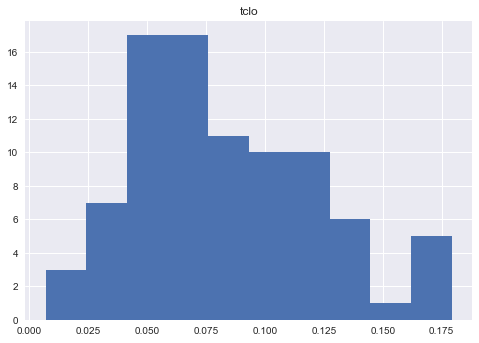

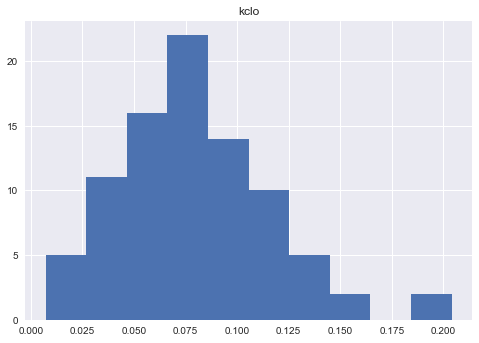

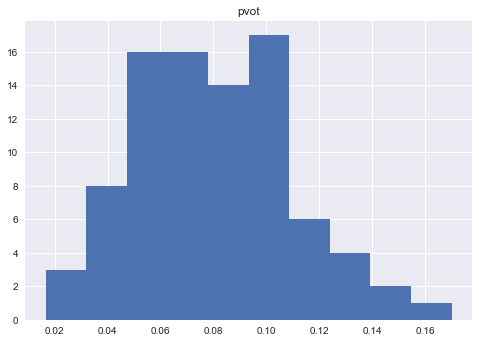

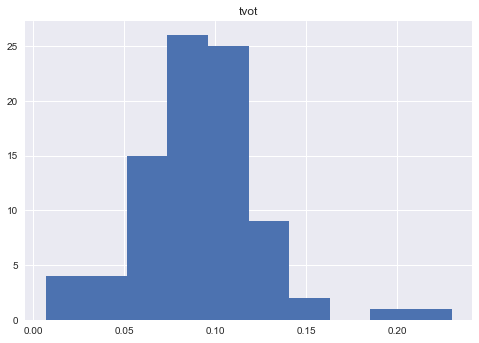

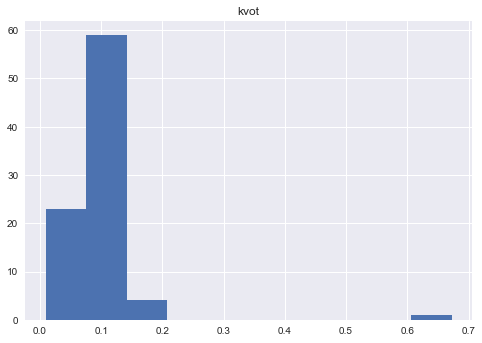

In [20]:
for column in vot.columns[2:]:
    vot.hist(column)

In [21]:
#maleTable = vot.loc[vot['gender'] == "Male"].hist(4)

In [22]:
#vot.loc[vot['gender'] == "Female"].hist(4)

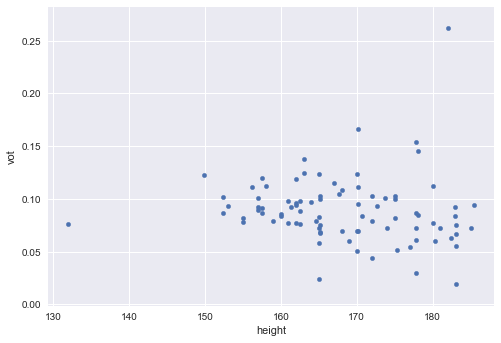

In [8]:
vot.plot.scatter("height",  "vot")

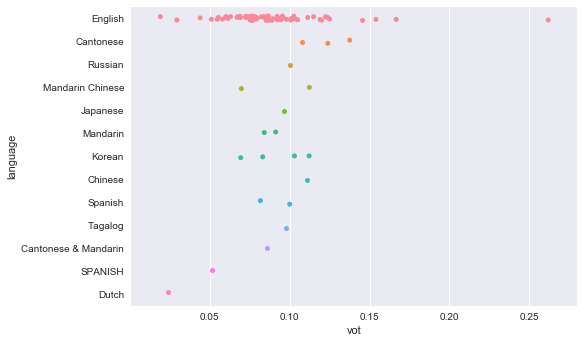

In [15]:
sns.stripplot(x="vot", y="language", data=vot, jitter=True);

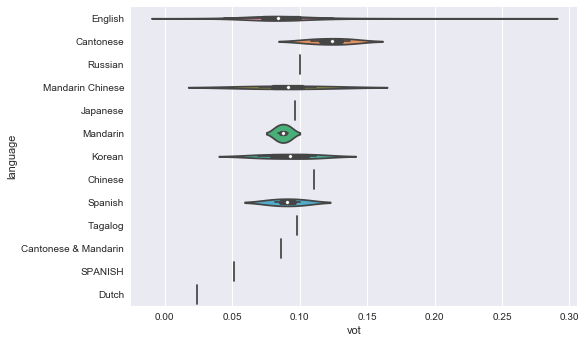

In [16]:
sns.violinplot(x="vot", y="language", data=vot);

In [37]:
#Compute basic properties (mean, median, mode, range)
import scipy
import numpy as np

vot_mean = np.mean(vot.vot)
vot_mode = scipy.stats.mode(vot.vot)[0][0]
vot_median = np.median(vot.vot)
vot_range = [min(vot.vot), max(vot.vot)]

print("VOT mean: ", vot_mean)
print("VOT mode: ", vot_mode)
print("VOT median: ", vot_median)
print("VOT range: ", vot_range)

VOT mean:  0.0894129731839
VOT mode:  0.072666667
VOT median:  0.086333333
VOT range:  [0.019, 0.26189699999999999]


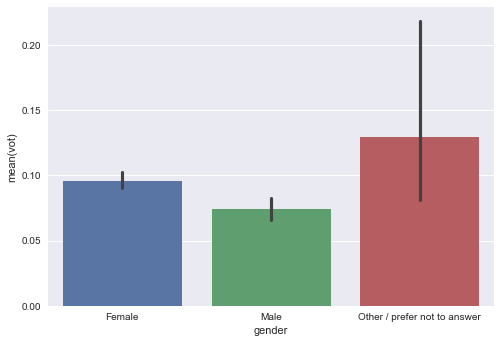

In [40]:
sns.barplot(x="gender", y="vot", data=vot)

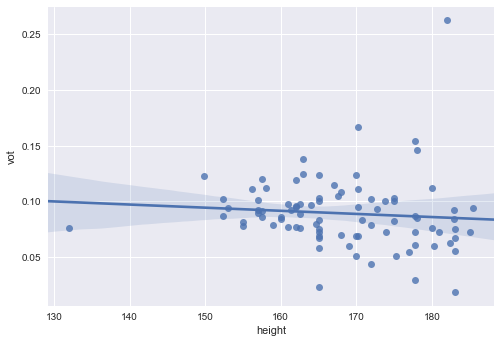

In [43]:
sns.regplot("height", "vot", data=vot)

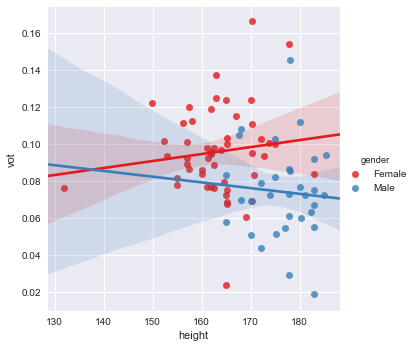

In [62]:
vot_mf = vot[vot['gender'] != 'Other / prefer not to answer']
sns.lmplot(x="height", y="vot", hue="gender", palette="Set1", data=vot_mf)

### Timit Section

In [2]:
files = ['data/vowel_midpoints_dr' + str(ind) + '.txt' for ind in range(1,9)]
timit = pd.concat([pd.read_csv(file, sep='\t') for file in files]).reset_index(drop=True)
timit.head(20)

,speaker,gender,file,t,word,vowel,stress,duration,f1,f2,f3,f0
0,fcjf0,female,sa1,0.3225,SHE,IY,1,0.08,486.2,2467.9,3185.1,244.9
1,fcjf0,female,sa1,0.5025,HAD,AE,1,0.10,595.1,2067.0,2976.7,241.6
2,fcjf0,female,sa1,0.6825,YOUR,UH,1,0.04,468.7,1956.1,3061.4,201.9
3,fcjf0,female,sa1,0.8525,DARK,AA,1,0.10,740.4,1674.1,2767.3,221.5
4,fcjf0,female,sa1,1.1975,SUIT,UW,1,0.17,464.0,1698.0,2904.9,232.6
5,fcjf0,female,sa1,1.3275,IN,AH,0,0.03,501.4,1929.1,2874.8,269.0
6,fcjf0,female,sa1,1.5525,GREASY,IY,1,0.04,431.5,2186.3,2858.7,207.8
7,fcjf0,female,sa1,1.7325,GREASY,IY,0,0.06,431.1,1368.3,2896.4,223.5
8,fcjf0,female,sa1,1.9175,WASH,AA,1,0.11,687.4,1309.6,2681.4,191.7
9,fcjf0,female,sa1,2.1775,WATER,AO,1,0.09,568.0,1105.9,2852.3,182.3


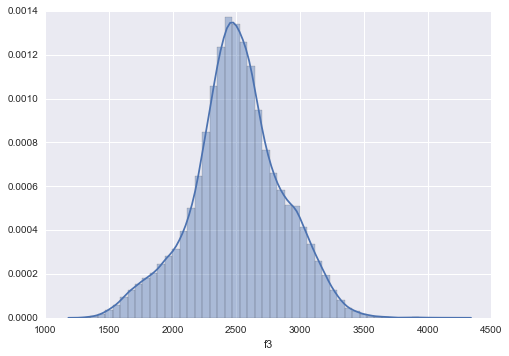

In [3]:
sns.distplot(timit['f3'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x103f3bb00>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1154c97f0>], dtype=object)

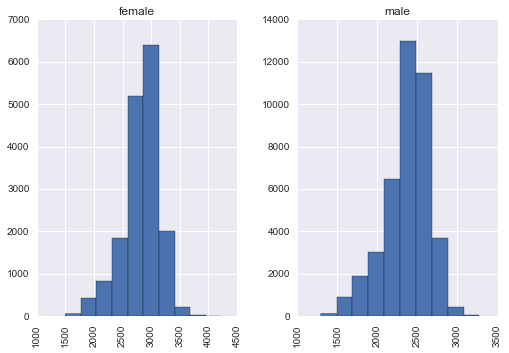

In [4]:
timit['f3'].hist(by=timit['gender'])

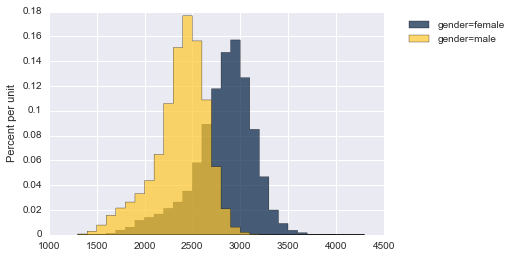

In [10]:
import datascience as ds
import matplotlib.pyplot as plt

table = ds.Table.from_df(timit)
table.select(['f3', 'gender']).hist(group='gender', bins=range(1300, 4400, 100))

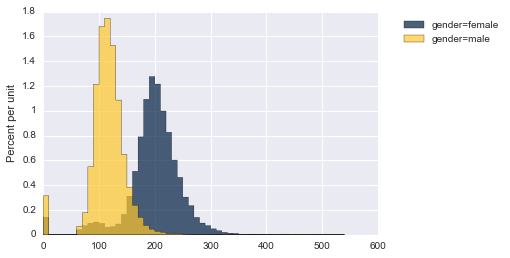

In [6]:
table.select(['f0', 'gender']).hist(group='gender', bins=range(0, 550, 10))

In [7]:
avgs = timit.groupby('vowel').mean()
avgs.head()

,t,stress,duration,f1,f2,f3,f0
vowel,,,,,,,
AA,1.551197,1.033222,0.116528,702.291314,1273.200030,2363.422859,140.806675
AE,1.422248,1.026110,0.116916,652.258700,1761.430284,2543.632762,140.214580
AH,1.635903,0.151153,0.048400,519.944476,1522.298740,2601.058553,135.055406
AO,1.868892,1.030502,0.123502,634.867838,1095.295097,2433.880965,136.410270
AW,1.448535,1.048387,0.156129,715.092608,1347.778226,2545.013978,144.840457


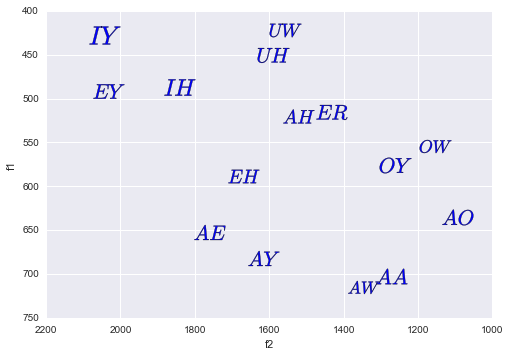

In [56]:
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

for i in range(len(avgs)):
    plt.scatter(avgs.f2[i], avgs.f1[i], marker=r"$ {} $".format(avgs.index[i]), s=1000)
    
plt.ylabel('f1')
plt.xlabel('f2')

In [40]:
pick_vowel = lambda vowel: table.where(table['vowel'] == vowel)

IY = pick_vowel('IY')
AY = pick_vowel('AY')
AA = pick_vowel('AA')
UW = pick_vowel('UW')

corners = [IY, AY, AA, UW]

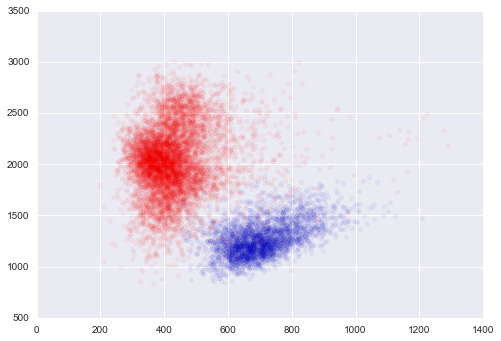

In [19]:
plt.scatter(AA['f1'], AA['f2'], alpha=.05)
plt.scatter(IY['f1'], IY['f2'], alpha=.05, color='r')

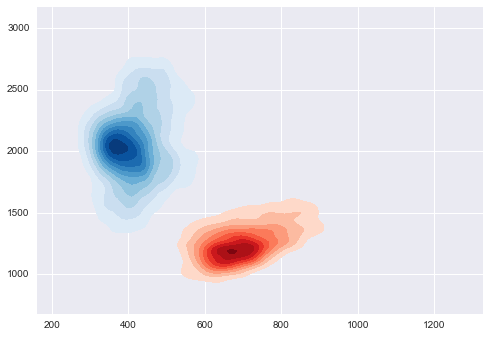

In [20]:
ax = sns.kdeplot(AA['f1'], AA['f2'], cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(IY['f1'], IY['f2'], cmap="Blues", shade=True, shade_lowest=False)

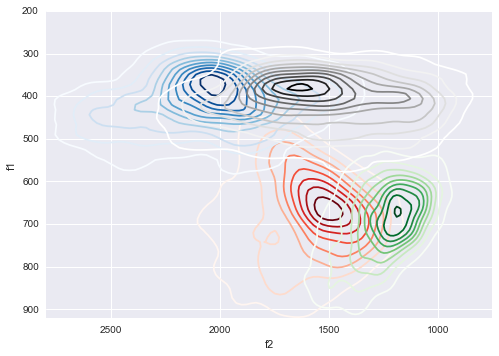

In [70]:
plt.ylim(920, 200)
plt.xlim(2800, 750)

ax = sns.kdeplot(AY['f2'], AY['f1'], cmap="Reds")
ax = sns.kdeplot(IY['f2'], IY['f1'], cmap="Blues")
ax = sns.kdeplot(AA['f2'], AA['f1'], cmap="Greens")
ax = sns.kdeplot(UW['f2'], UW['f1'], cmap="Greys")

plt.ylabel('f1')
plt.xlabel('f2')

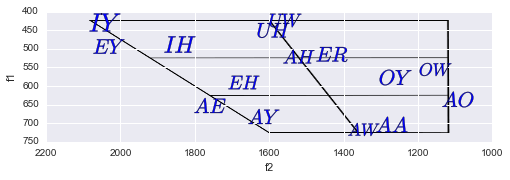

In [80]:
plt.figure(figsize=(8, 10))

plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

for i in range(len(avgs)):
    plt.scatter(avgs.f2[i], avgs.f1[i], marker=r"$ {} $".format(avgs.index[i]), s=1000)
    
plt.ylabel('f1')
plt.xlabel('f2')

im = plt.imread('images/blankvowel.png')
ax = plt.imshow(im, extent=(plt.xlim()[0], plt.xlim()[1], plt.ylim()[0], plt.ylim()[1]))

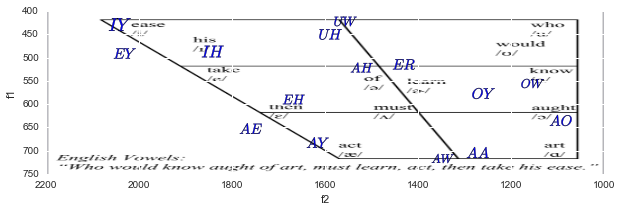

In [65]:
plt.figure(figsize=(10,4))

plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

for i in range(len(avgs)):
    plt.scatter(avgs.f2[i], avgs.f1[i], marker=r"$ {} $".format(avgs.index[i]), s=500)
    
plt.ylabel('f1')
plt.xlabel('f2')

im = plt.imread('images/notblank.png')
ax = plt.imshow(im, extent=(2200, 1000, 750, 400))